
<table>
<table border = 5  align = center bgcolor="white" cellspacing="10px">

<tr>
<td><a href="https://drive.google.com/file/d/14zSOmdu6bdqw-uaDRTpgRnSfsDi90DbU/view?usp=sharing"> <img alt="Colaboratory logo" width="150px"  src="https://miro.medium.com/max/986/1*S2AyJcdw8EPcn7gwDVSBCA.png" align="left" hspace="10px" vspace="0px" /> </a> </td>
   
    
 
<td></td>
    
<td><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitmilab.redclara.net%2FhalleyUIS%2Fmoncora.git/4d1344cb6f0df9a23bce6fe9d70812719aeb0fe5?urlpath=lab%2Ftree%2FBook%2FJupyter_Notebooks%2FDatosII.ipynb"><img src="https://mybinder.org/static/images/logo_social.png" alt="Alternative text" width="150px"  /></a>
</td>

</tr>

</table>
    
<br>
    
---

# <strong>Los datos hablan I - Aspectos basicos</strong>

En este Notebook, realizaremos una **visualización gráfica** de los datos de temperatura obtenidos de las [estaciones](https://class.redclara.net/halley/moncora/intro.html) meteorológicas de la red RACIMO-Móncora para un periodo de tiempo determinado. Para esto, utilizaremos pricipalmente las librerias de Python [MakeSens](https://docs.makesens.co/help/api-sdk/makesensapi-en-python) para acceder a los datos, [Pandas](https://pandas.pydata.org/) para manejarlos y [Matplotlib](https://matplotlib.org/) para visualizarlos.



## **1. Obtención de datos**

In [1]:
!pip install APIMakeSens

In [2]:
from MakeSens import MakeSens
import numpy as np
import pandas as pd

**Extracción de todos los datos**

In [3]:
estacion = 'mE1_00008'           # Nombre estacion miniEva
start = '2023-08-06 00:00:00'    # Fecha de inicio: año-mes-día hora:minuto:segundo
end   = '2023-08-10 00:00:00'    # Fecha de fin:    año-mes-día hora:minuto:segundo
frec  = '1H'                      # m: minutos, h: horas, d: días

data = MakeSens.download_data(estacion, start, end,frec) # Descargar los datos

In [4]:
data

,ts,humedad,humedad2,iluminancia,pm10_1,pm10_1_AE,pm10_2,pm10_2_AE,pm1_1,pm1_1_AE,...,pm_n_10_0_2,pm_n_1_0_1,pm_n_1_0_2,pm_n_2_5_1,pm_n_2_5_2,pm_n_5_0_1,pm_n_5_0_2,presion,temperatura,temperatura2
0,2023-08-06 00:00:00,41.795567,45.935131,276.588235,24.117647,24.117647,22.823529,22.823529,16.294118,16.294118,...,0.529412,140.588235,131.529412,4.470588,14.352941,1.882353,1.411765,763.888413,35.680620,35.195158
1,2023-08-06 01:00:00,54.110807,54.658034,277.428571,24.071429,24.071429,22.214286,22.214286,15.071429,15.071429,...,0.714286,128.000000,124.285714,9.000000,11.785714,3.285714,1.357143,926.873191,30.650614,31.461814
2,2023-08-06 02:00:00,57.208898,57.309433,281.263158,22.526316,22.526316,20.315789,20.315789,15.000000,15.000000,...,0.210526,124.631579,118.894737,6.105263,10.421053,2.105263,0.578947,959.752027,29.312806,30.133075
3,2023-08-06 03:00:00,55.610882,55.738765,277.600000,19.500000,19.500000,18.400000,18.400000,13.250000,13.250000,...,0.400000,111.100000,106.300000,4.900000,8.400000,1.300000,0.900000,954.641693,29.573282,30.426375
4,2023-08-06 04:00:00,54.491971,54.713984,276.761905,16.285714,16.285714,14.714286,14.714286,10.761905,10.761905,...,0.428571,93.523810,82.761905,4.285714,7.666667,1.428571,0.857143,944.244318,30.000366,30.865060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2023-08-09 19:00:00,43.495257,44.093385,29302.600000,9.050000,9.050000,8.200000,8.200000,5.850000,5.850000,...,0.050000,56.200000,49.800000,2.200000,4.000000,0.900000,0.150000,839.027978,33.644205,34.725871
92,2023-08-09 20:00:00,45.208078,45.627925,9849.086957,10.695652,10.695652,9.565217,9.565217,7.130435,7.130435,...,0.217391,59.913043,55.173913,2.869565,5.869565,1.217391,0.478261,879.771601,32.342003,33.375429
93,2023-08-09 21:00:00,48.979967,49.307286,19526.058824,13.058824,13.058824,10.882353,10.882353,8.705882,8.705882,...,0.176471,72.823529,65.529412,4.000000,4.588235,1.294118,0.588235,898.205767,31.705790,32.688191
94,2023-08-09 22:00:00,48.923693,49.502132,3470.833333,11.500000,11.500000,10.833333,10.833333,7.888889,7.888889,...,0.166667,69.888889,66.833333,2.333333,5.500000,0.666667,0.388889,892.126736,31.911107,32.764871


**Nota:** En total tenemos 32 columnas, en este enlace puedes conocer acerca de cada una de ellas: [Campo de datos](https://docs.makesens.co/productos/minieva/acceso-a-los-datos/campos-de-datos)

**Selección de columnas de datos**

Fijate que ahora el índice de los datos es un entero desde 0.

In [5]:
data[['temperatura']] #Se puede añadir valores, la razon de la doble lista

,temperatura
0,35.680620
1,30.650614
2,29.312806
3,29.573282
4,30.000366
...,...
91,33.644205
92,32.342003
93,31.705790
94,31.911107


In [6]:
cols =['ts',"temperatura", "temperatura2"] 
data[cols]#explicacion de porque y como sobre la utilidad de la doble lista

,ts,temperatura,temperatura2
0,2023-08-06 00:00:00,35.680620,35.195158
1,2023-08-06 01:00:00,30.650614,31.461814
2,2023-08-06 02:00:00,29.312806,30.133075
3,2023-08-06 03:00:00,29.573282,30.426375
4,2023-08-06 04:00:00,30.000366,30.865060
...,...,...,...
91,2023-08-09 19:00:00,33.644205,34.725871
92,2023-08-09 20:00:00,32.342003,33.375429
93,2023-08-09 21:00:00,31.705790,32.688191
94,2023-08-09 22:00:00,31.911107,32.764871


## **2. Análsisis de Temperatura**

**¿Por qué tenemos dos columnas de temperatura?**

Las dos columnas corresponden a dos sensores diferentes que toman datos de maner independiente. Esto garantiza una mayor confianza en la medición.

### **Extracción de columnas**

In [7]:
## 1ra forma
temp = data[['ts',"temperatura", "temperatura2"]].copy()   # Seleccionamos Tiempo, Temperatura 1, Temperatura 2
temp.columns = ['ts',"T1", "T2"]                           # Renombramos las columnas
temp.index = temp['ts']                                    # Seleccionamos índices
del temp['ts']                                             # Borramos columnas de índices

In [8]:
## 2da forma
temp = data[['ts',"temperatura", "temperatura2"]].copy()   # Seleccionamos Tiempo, Temperatura 1, Temperatura 2
temp.columns = ['ts', 'T1','T2']                           # Renombramos columnas
temp = temp.set_index('ts')                                # Fijamos índices

In [9]:
temp

,T1,T2
ts,,
2023-08-06 00:00:00,35.680620,35.195158
2023-08-06 01:00:00,30.650614,31.461814
2023-08-06 02:00:00,29.312806,30.133075
2023-08-06 03:00:00,29.573282,30.426375
2023-08-06 04:00:00,30.000366,30.865060
...,...,...
2023-08-09 19:00:00,33.644205,34.725871
2023-08-09 20:00:00,32.342003,33.375429
2023-08-09 21:00:00,31.705790,32.688191


### **Conversión de índice a formato de fecha**

Esto nos permite hacer cosas interesantes

In [10]:
temp.index = pd.to_datetime(temp.index)                   # Convertimos el indice a formato datetime

In [11]:
# Datos de un mes especifico
temp.loc['2023-08']

,T1,T2
ts,,
2023-08-06 00:00:00,35.680620,35.195158
2023-08-06 01:00:00,30.650614,31.461814
2023-08-06 02:00:00,29.312806,30.133075
2023-08-06 03:00:00,29.573282,30.426375
2023-08-06 04:00:00,30.000366,30.865060
...,...,...
2023-08-09 19:00:00,33.644205,34.725871
2023-08-09 20:00:00,32.342003,33.375429
2023-08-09 21:00:00,31.705790,32.688191


In [12]:
# Datos de un día especifico
temp.loc['2023-08-06']

,T1,T2
ts,,
2023-08-06 00:00:00,35.680620,35.195158
2023-08-06 01:00:00,30.650614,31.461814
2023-08-06 02:00:00,29.312806,30.133075
2023-08-06 03:00:00,29.573282,30.426375
2023-08-06 04:00:00,30.000366,30.865060
2023-08-06 05:00:00,30.755755,31.590799
2023-08-06 06:00:00,30.169954,31.058679
2023-08-06 07:00:00,28.961733,29.818972
2023-08-06 08:00:00,28.074346,28.997604


In [13]:
# Datos de una hora especifica de un día
temp.loc['2023-08-06 10']

T1    27.005586
T2    27.935136
Name: 2023-08-06 10:00:00, dtype: float64

## **2.1. Promedio por sensores y por día**
**¿Los datos de temperatura miden lo mismo?**

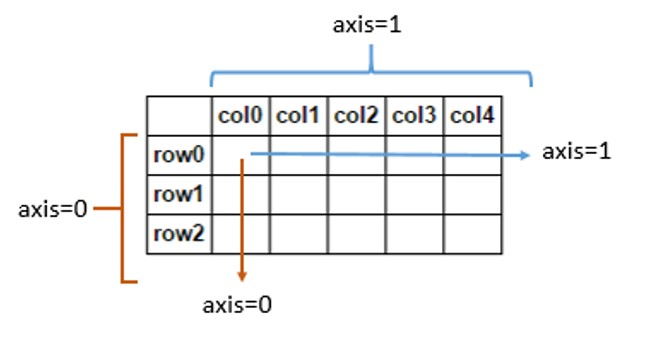

### **Promedio**

Tenemos dos formas, cualquiera de ellas es válida, la primera es más general y la segunda más simple

In [14]:
temp['mean'] = temp[['T1','T2']].mean(axis=1)    # 1ra forma
#temp[['T1','T2']].mean(axis=1)
temp

,T1,T2,mean
ts,,,
2023-08-06 00:00:00,35.680620,35.195158,35.437889
2023-08-06 01:00:00,30.650614,31.461814,31.056214
2023-08-06 02:00:00,29.312806,30.133075,29.722940
2023-08-06 03:00:00,29.573282,30.426375,29.999828
2023-08-06 04:00:00,30.000366,30.865060,30.432713
...,...,...,...
2023-08-09 19:00:00,33.644205,34.725871,34.185038
2023-08-09 20:00:00,32.342003,33.375429,32.858716
2023-08-09 21:00:00,31.705790,32.688191,32.196990


In [15]:
temp[['T1','T2']].mean(axis=0)

T1    32.385043
T2    33.162858
dtype: float64

In [16]:
temp['mean'] = (temp['T1'] + temp['T2'])/2       # 2da forma

### **Remuestreo / Promedio**

La funcion `.resample('d')` permite agrupar los datos por día `'d'`, mes `'m'` u hora `'h'` entre otros. Veamos como funciona.

In [17]:
temp_h = temp.resample('h').mean()          # Remuestreo por hora

In [18]:
temp_d = temp.resample('d').mean()          # Remuestreo por día

In [19]:
temp_m = temp.resample('10 min').mean()     # Remuestreo por 10 minutos

In [23]:
temp_d

,T1,T2,mean
ts,,,
2023-08-06,32.683849,33.502428,33.093139
2023-08-07,31.791357,32.600821,32.196089
2023-08-08,33.025470,33.714028,33.369749
2023-08-09,32.039496,32.834153,32.436825


Para más información sobre la función ```.resample()``` consultar la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html). 

### **Generación de gráficos**

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

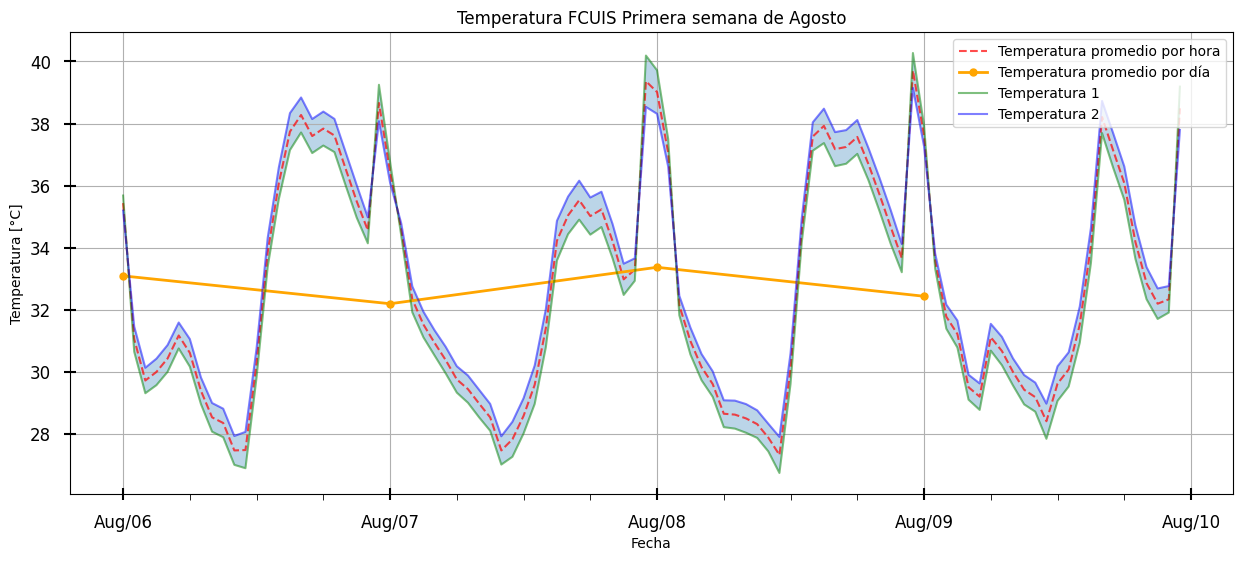

In [25]:
## Generamos la figura
fig = plt.figure(figsize=(15, 6))
ax = fig.gca()

# Graficamos los datos
plt.plot(temp_h['mean'],  '--r', label="Temperatura promedio por hora", ms=4, alpha=0.7)
plt.plot(temp_d['mean'],  '-o',  label="Temperatura promedio por día",  ms=5, lw=2, color="orange")
plt.plot(temp_h['T1'], "-g",  label="Temperatura 1",    alpha=0.5)
plt.plot(temp_h['T2'], "-b",  label="Temperatura 2",    alpha=0.5)
plt.fill_between(temp_h.index, y1 = temp_h.T1, y2 = temp_h.T2, alpha=0.3)

# Configuraciones finales
#Formateamos el eje de fechas para que se vea mejor
ax.tick_params(which='major', pad=10, length=8, labelsize=12, direction="inout", width=1.5) # Lineas o segmentos sobre el eje
ax.tick_params(which='minor', length=4)                         # Lineas o segmentos sobre los ejes 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%d'))     # Formato de las fechas en el eje x
ax.xaxis.set_major_locator(mdates.DayLocator())                 # Posicióon de las ticks mayores
ax.xaxis.set_minor_locator(mdates.HourLocator([0,6,12,18]))     # Posición de las ticks menores

#Agregamos la leyenda y los titulos
plt.xlabel('Fecha')
plt.ylabel("Temperatura [°C]")
plt.title("Temperatura FCUIS Primera semana de Agosto")
plt.grid(True)
plt.legend()

plt.show()

## **2.2. Promedio por agrupamiento**
**¿Exite un ciclo diurno en la temperatura?**

En los datos podemos buscar comportamientos que varien durante periodos de tiempo determinado. Por ejemplo, podemos promediar el valor de la temperatura en todas las horas del dia buscando patrones. Para esto usamos a función ```.groupby()``` de Pandas.
> Para más información sobre la función groupby, consultar la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). 

In [26]:
'20M'
temp['hora'] = temp.index.hour.values # Agregamos una columna "hora" al DataFrame temp que contenga la hora de cada dato
temp

,T1,T2,mean,hora
ts,,,,
2023-08-06 00:00:00,35.680620,35.195158,35.437889,0
2023-08-06 01:00:00,30.650614,31.461814,31.056214,1
2023-08-06 02:00:00,29.312806,30.133075,29.722940,2
2023-08-06 03:00:00,29.573282,30.426375,29.999828,3
2023-08-06 04:00:00,30.000366,30.865060,30.432713,4
...,...,...,...,...
2023-08-09 19:00:00,33.644205,34.725871,34.185038,19
2023-08-09 20:00:00,32.342003,33.375429,32.858716,20
2023-08-09 21:00:00,31.705790,32.688191,32.196990,21


In [27]:
pm_data_h = pm_data.groupby(pm_data['hora']).mean()
pm_data_hstd = pm_data.groupby(pm_data['hora']).std()

NameError: name 'pm_data' is not defined

<BarContainer object of 3 artists>

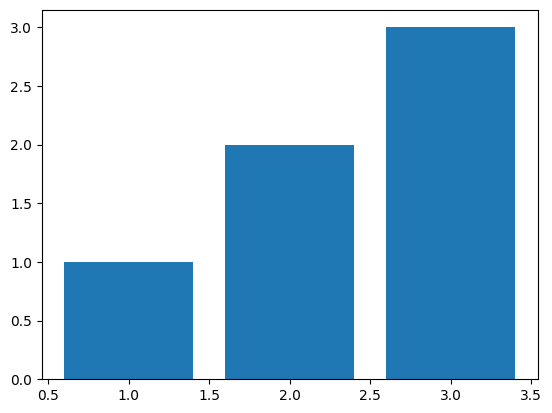

In [28]:
plt.bar([1,2,3],[1,2,3])

In [29]:
horario_mean.head()

NameError: name 'horario_mean' is not defined

### **La función `.gropuby()`**

* La función ```.groupby()``` agrupa los datos por hora de todos los días del dataset, promediandolos en uno solo. 
* Esto nos permitirá visualizar los datos de temperatura con un dato para cada hora del día. 
* Además de obtener el promedio de la temperatura para cada hora, también podemos obtener los valor máximos y mínimos, esto con las funciones ```.max()``` y ```.min()```. 

In [34]:
# Agrupamos los valores de la temperatura por hora y promediamos con .mean()
horario = temp['mean'].groupby(temp['hora']).mean()
horario_1 = temp['T1'].groupby(temp['hora']).mean()
horario_2 = temp['T2'].groupby(temp['hora']).mean()

# Obtenemos los valores máximos y minimos de temperatura durante la semana para cada hora con .max() y .min()
horario_max = temp['mean'].groupby(temp['hora']).max()
horario_min = temp['mean'].groupby(temp['hora']).min()
horario_mean = temp['mean'].groupby(temp['hora']).mean()

### **Generación de gráficas**

Una vez obtenidos los valores promedio de temperatura por hora, graficamos el promedio, el máximo y el mínimo de cada hora de la misma forma que en el proceso anterior.

NameError: name 'pm_data_h' is not defined

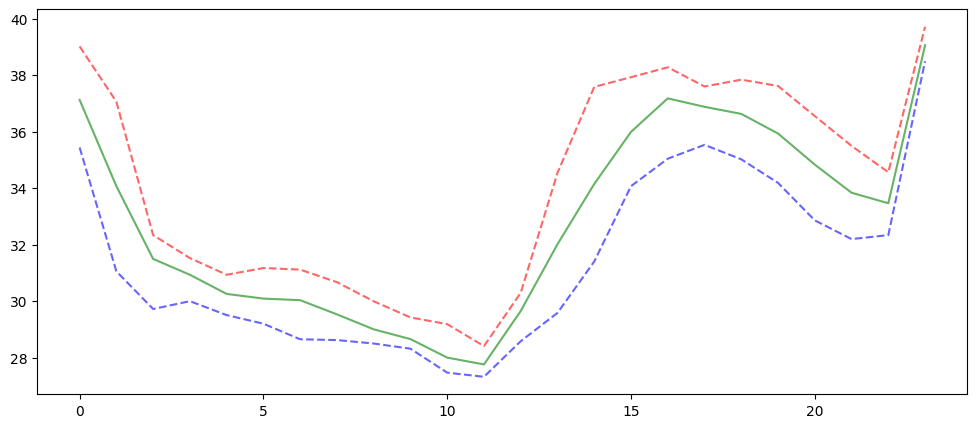

In [35]:
#Generamos la figura
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

#Graficamos los datos
plt.plot(horario_mean, '-g',  label="Temperatura media por hora", alpha=0.6)
plt.plot(horario_max,  '--r', label="Temperatura máxima",         alpha=0.6)
plt.plot(horario_min,  '--b', label="Temperatura mínima",         alpha=0.6)

#Coloreamos el area entre las lineas de maximo y minimo
plt.fill_between(pm_data_h.index, pm_data_h+pm_data_h_std, 
            pm_data_h-pm_data_h_std, alpha=0.3, color="yellow")

#Formateamos el eje de fechas para que se vea mejor
ax.tick_params(which='major', pad=10, length=8, labelsize=12, direction="inout", width=1.5)
ax.tick_params(which='minor', length=4)
ax.set_xticks(range(0,24,5))
ax.set_xticks(range(0,24,1), minor=True)
ax.set_xticklabels(["00:00", "05:00", "10:00", "15:00", "20:00"])

#Agregamos la leyenda, los titulos y la grilla
plt.ylabel("Material particulado [$\mu g/cm^3$]")
plt.xlabel("Hora")
plt.title("Material particulado en FCUIS por hora")
plt.grid(True)
plt.legend()
plt.show()

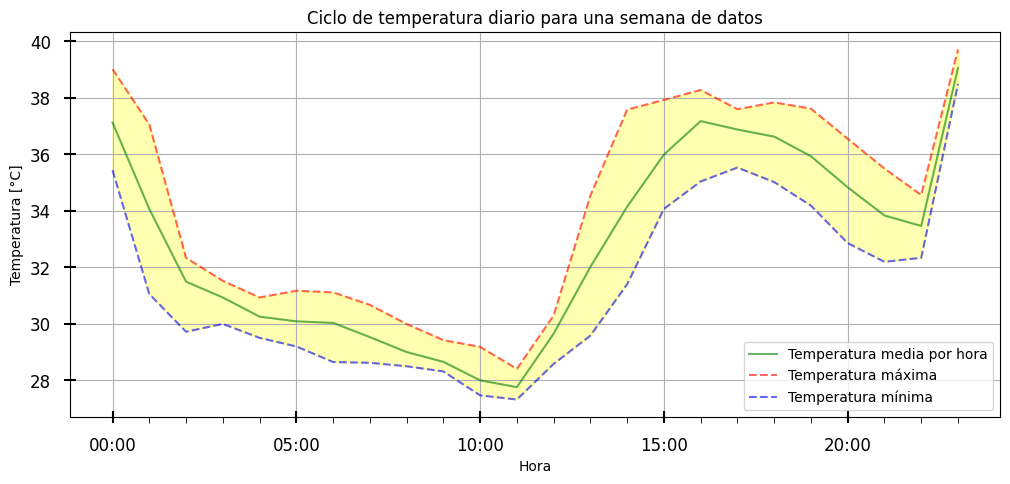

In [36]:
#Generamos la figura
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

#Graficamos los datos
plt.plot(horario_mean, '-g',  label="Temperatura media por hora", alpha=0.6)
plt.plot(horario_max,  '--r', label="Temperatura máxima",         alpha=0.6)
plt.plot(horario_min,  '--b', label="Temperatura mínima",         alpha=0.6)

#Coloreamos el area entre las lineas de maximo y minimo
plt.fill_between(horario_max.index, horario_max, horario_min, alpha=0.3, color="yellow")

#Formateamos el eje de fechas para que se vea mejor
ax.tick_params(which='major', pad=10, length=8, labelsize=12, direction="inout", width=1.5)
ax.tick_params(which='minor', length=4)
ax.set_xticks(range(0,24,5))
ax.set_xticks(range(0,24,1), minor=True)
ax.set_xticklabels(["00:00", "05:00", "10:00", "15:00", "20:00"])

#Agregamos la leyenda, los titulos y la grilla
plt.ylabel("Temperatura [°C]")
plt.xlabel("Hora")
plt.title("Ciclo de temperatura diario para una semana de datos")
plt.grid(True)
plt.legend()

plt.show()


> ¿Este ciclo tiene sentido para ti?  

>¿Cómo piensas que se modificaria la grafica si ampliamos el periodo de los datos?

## **2.3. Cuartiles y Digrama de Caja y Bigotes**

### **Cuartiles**

**¿Qué tan representativo es el promedio de cada hora respecto al comportamiento real?**

* Con representativo nos referimos a que tan cercano es el promedio de cada hora a la temperatura real durante ese periodo de tiempo. 
* Para responder esta pregunta podemos tener una visión más clara si calculamos los cuartiles del conjunto de datos.

**¿Qué son los cuartiles?**

* Los cuartiles son valores que dividen un conjunto de datos ordenados en cuatro partes iguales. 
* Si los cuartiles están muy separados, significa que los datos están muy dispersos y el promedio no es representativo.
* Si los cuartiles están muy cercanos, significa que los datos están muy concentrados y el promedio es representativo.

Tenemos dos maneras de hallar los cuartiles, la primera es más simple y la segunda más general.

In [ ]:
## 1ra forma

# Usamos la función .quantille()
q1 = temp['mean'].groupby(temp['hora']).quantile(0.25)
q2 = temp['mean'].groupby(temp['hora']).quantile(0.5)
q3 = temp['mean'].groupby(temp['hora']).quantile(0.75)
mean = temp['mean'].groupby(temp['hora']).mean()

cuartiles = pd.DataFrame(q1)
cuartiles['q1'] = q1
cuartiles['q2'] = q2
cuartiles['q3'] = q3
cuartiles['mean'] = mean

In [21]:
## 2da forma

# Definimos las funciones para cada cuartil
def q1(x):                   # Cuartil 1
    return x.quantile(0.25)

def q2(x):                   # Cuartil 2
    return x.median()

def q3(x):                   # Cuartil 3
    return x.quantile(0.75)
cuartiles = temp['mean'].groupby(temp['hora']).agg([q1, q2, q3, np.mean])

KeyError: 'hora'

### **Generación de gráficas**

In [22]:
# Generamos la figura
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

# Graficamos los datos a partir del DataFrame con la función plot de pandas
cuartiles.plot(ax=ax, alpha=0.7, style=["-","--","-","--"], color=["black","purple","blue","green"])

# Graficamos los valores máximos y mínimos
plt.plot(horario_max,'-r', label="Temperatura máxima", alpha=0.6)
plt.plot(horario_min,'-b', label="Temperatura mínima", alpha=0.6)

# Coloreamos el area entre las lineas de maximo y minimo
plt.fill_between(horario_max.index, horario_max, horario_min, alpha=0.3, color="yellow")

# Formateamos el eje de fechas para que se vea mejor
ax.tick_params(which='major', pad=10, length=8, labelsize=12, direction="inout", width=1.5)
ax.tick_params(which='minor', length=4)
ax.set_xticks(range(0,24,5))
ax.set_xticks(range(0,24,1), minor=True)
ax.set_xticklabels(["00:00", "05:00", "10:00", "15:00", "20:00"])

# Agregamos la leyenda, los titulos y la grilla
plt.ylabel("Temperatura [°C]")
plt.xlabel("Hora")
plt.title("Ciclo Temperatura Diario")
plt.grid(True)
plt.legend()

plt.show()


NameError: name 'plt' is not defined

* ¿Qué puedes decir de los cuartiles de los datos respecto al promedio?  
* ¿Qué puedes decir de los cuartiles de los datos respecto a los valores máximos y mínimos? 
* ¿Qué dice esto de la representatividad del promedio de cada hora?

### **2.4. Diagrama de cajas y bigotes**

* Podemos graficar los cuartiles, el promedio y los valores extremos de una forma más clara utilizando un **gráfico de cajas y bigotes**.
* Emplearemos la librería [Seaborn](https://seaborn.pydata.org/) especializada en visualización estadística.

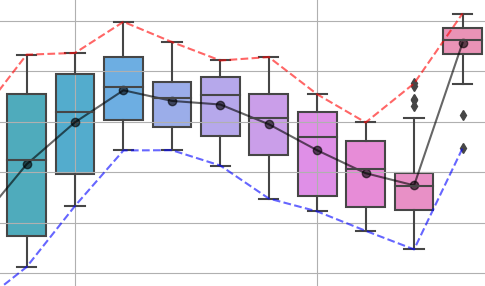

* En este gráfico, la caja representa el rango intercuartil (IQR)
* La línea horizontal dentro de la caja representa la mediana (Q2)
* Los bigotes representan los valores máximos y mínimos.
* Los puntos representan los valores atípicos. 
* Estos valores máximos y mínimos se calculan como 1.5 veces el rango intercuartil

### **Generación de gráficas**

In [ ]:
import seaborn as sns

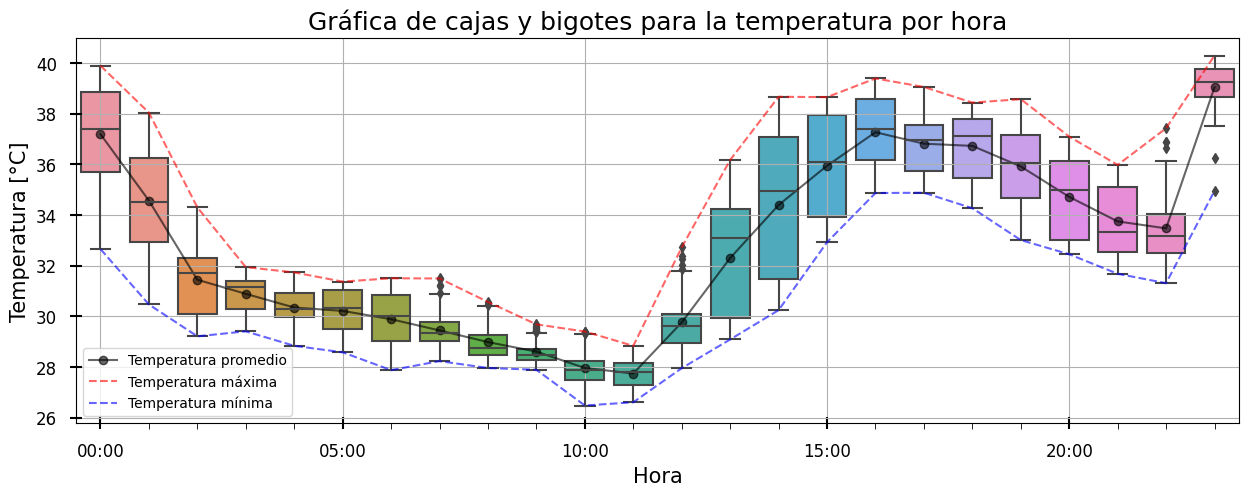

In [ ]:
# Generamos la figura
fig = plt.figure(figsize=(15, 5))
ax = fig.gca()

# Diagrama cajas y bigotes
sns.boxplot(data = temp, x='hora', y='mean', ax=ax)

# Otros graficos
plt.plot(horario,     '-ok', label="Temperatura promedio", alpha=0.6)
plt.plot(horario_max, '--r', label="Temperatura máxima",   alpha=0.6)
plt.plot(horario_min, '--b', label="Temperatura mínima",   alpha=0.6)


# Formateamos el eje de fechas para que se vea mejor
ax.tick_params(which='major', pad=10, length=8, labelsize=12, direction="inout", width=1.5)
ax.tick_params(which='minor', length=4)
ax.set_xticks(range(0,24,5))
ax.set_xticks(range(0,24,1), minor=True)
ax.set_xticklabels(["00:00", "05:00", "10:00", "15:00", "20:00"], fontsize=12)

# Agregamos la leyenda, los titulos y la grilla
plt.ylabel("Temperatura [°C]", fontsize=15)
plt.xlabel("Hora", fontsize=15)
plt.title("Gráfica de cajas y bigotes para la temperatura por hora", fontsize=18)
plt.legend()
plt.grid(True)

plt.show()

* ¿Qué puedes decir de los valores atípicos?  
* ¿Cómo se relacionan los valores atípicos con los valores máximos y mínimos?  
* ¿Puedes decir que tan representativo es el promedio de cada hora respecto a los datos reales?